In [7]:
import numpy as np
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [11]:
low = 1
high = 10
diff = high - low

A = np.random.random(size = (3))*diff + low
B = np.random.random(size = (3))*diff + low
C = np.random.random(size = (3))*diff + low

tr = [A,B,C]

pt_internes = []
for _ in range(10000):
    a = np.random.rand()
    b = np.random.rand()*(1-a)
    c = 1 - a - b
    New_pt = c*C + a*A + b*B
    pt_internes.append(New_pt)

In [5]:
k = [1,4,3]
k[:2]+k[3:]

[1, 4]

In [8]:
def projection(Tr,P):
    "projete le point x sur le triangle tr"
    # On projette les deux points sur le plan du triangle et on s'assure que c'est dedans
    A = Tr[0]
    B = Tr[1]
    C = Tr[2]
    #Calcul du vecteur normal
    N = np.cross(B-A,B-C)
    n = N/np.linalg.norm(N)
    d = np.dot(n,P-A)
    return P - d*n

def area_of_triangle(Tr):
    "calcule l'aire d'un triangle array"
    p1, p2, p3 = Tr[0], Tr[1], Tr[2]
    return 0.5 * np.linalg.norm(np.cross(p2 - p1, p3 - p1))

def intersection(Tr,P,Q):
    "determine l'intersection entre PQ et le plan du triangle Tr "
    A = projection(Tr,P)
    B = projection(Tr,Q)
    # on cherche l'intersectionn entre BA et PQ
    ind = 2
    if 0 in P-Q :
        ind = list(P-Q).index(0)
    a,a_p = tuple(list(B-A)[:ind]+list(B-A)[ind+1:])
    b,b_p = tuple(list(P-Q)[:ind]+list(P-Q)[ind+1:])
    c,c_p = tuple(list(P-A)[:ind]+list(P-A)[ind+1:])
    print((a*b_p - a_p*b))
    t = (a*c_p - a_p*c)/(a*b_p - a_p*b)
    lbda = (c*b_p - c_p*b)/(a*b_p - a_p*b)
    assert np.isclose(P +t*(Q-P), A+lbda*(B-A)).all() ,(P +t*(Q-P), A+lbda*(B-A))
    return P +t*(Q-P)


def is_inside(Tr,P): 
    "determine si un point P est à l'intérieur d'un triangle Tr"
    A, B, C = Tr[0], Tr[1], Tr[2]
    Tr1 = [A,B,P]
    Tr2 = [A,C,P]
    Tr3 = [B,C,P]
    Somme = area_of_triangle(Tr1) + area_of_triangle(Tr2) + area_of_triangle(Tr3)
    Total = area_of_triangle(Tr)
    # assert(Total <= Somme), "Error dans le test"
    return np.isclose(Somme ,Total)

def traverse(Tr,P,Q):
    "determine si PQ traverse Tr"
    # les points P et Q  doivent etre dans deux sens opposés de de tr
    P_proj = projection(Tr,P)
    Q_proj = projection(Tr,Q)
    n_P = (P - P_proj)
    n_Q = (Q - Q_proj)
    print(np.dot(n_P,n_Q))
    if np.dot(n_P,n_Q) > 0 :
        return False
    Z = intersection(Tr,P,Q)
    return is_inside(Tr,Z) 



## Visualize and test the method

(1.0, 10.0)

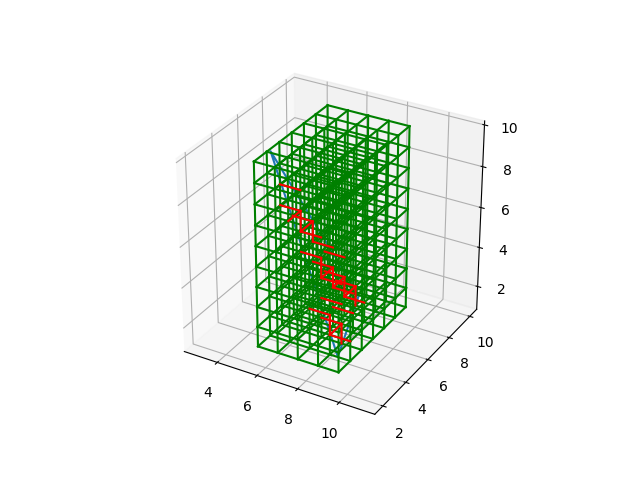

In [15]:
X,Y,Z = [],[],[]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


xs = [ind[0] for ind in tr] + [tr[0][0]]
ys = [ind[1] for ind in tr] + [tr[0][1]]
zs = [ind[2] for ind in tr] + [tr[0][2]]
ax.plot(xs,ys,zs)

X = X + list(xs)
Y = Y + list(ys)
Z = Z + list(zs)



for (P,Q) in detect_edges(tr):
    ax.plot([P[0],Q[0]],[P[1],Q[1]],[P[2],Q[2]],color='green')

    X= X + [P[0],Q[0]]
    Y = Y +[P[1],Q[1]]
    Z = Z + [P[2],Q[2]]

for (P,Q) in S:
    ax.plot([P[0],Q[0]],[P[1],Q[1]],[P[2],Q[2]],color='red')

    X= X + [P[0],Q[0]]
    Y = Y +[P[1],Q[1]]
    Z = Z + [P[2],Q[2]]

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5

ax.grid(True)

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

In [73]:
cpt = 0
#Calcul du vecteur normal
N = np.cross(B-A,B-C)
n = N/np.linalg.norm(N)
K = []
for i in pt_internes:
    i = i + 10*(1- 2*np.random.rand())*n
    K.append(i)
    if not in_prism(tr,i):
        print("Error")
        cpt = cpt + 1

## Apply it to mesh

In [9]:
def detect_edges(Tr):
    x_coords = [point[0] for point in Tr]
    y_coords = [point[1] for point in Tr]
    z_coords = [point[2] for point in Tr]

    # Calculate min and max for each dimension with integer bounds
    x_min = math.floor(min(x_coords))
    y_min = math.floor(min(y_coords))
    z_min = math.floor(min(z_coords))

    x_max = math.ceil(max(x_coords))
    y_max = math.ceil(max(y_coords))
    z_max = math.ceil(max(z_coords))   

    """Gives all the edges in the 3D grid 
    with the xyz limitaion"""
    edges = []
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            for z in range(z_min, z_max + 1):
                # Add edges parallel to the x-axis
                if x < x_max:
                    edges.append(((x, y, z), (x + 1, y, z)))
                # Add edges parallel to the y-axis
                if y < y_max:
                    edges.append(((x, y, z), (x, y + 1, z)))
                # Add edges parallel to the z-axis
                if z < z_max:
                    edges.append(((x, y, z), (x, y, z + 1)))
    
    return edges

In [16]:
S = []
for P,Q in detect_edges(tr):
    print(P,Q)
    if traverse(tr,np.array(P),np.array(Q)):
        S.append((P,Q))

(5, 3, 1) (6, 3, 1)
8.33565825043053
(5, 3, 1) (5, 4, 1)
10.427027487090358
(5, 3, 1) (5, 3, 2)
10.239335824606568
(5, 3, 2) (6, 3, 2)
6.489280564788102
(5, 3, 2) (5, 4, 2)
8.372765078825212
(5, 3, 2) (5, 3, 3)
8.203730202771139
(5, 3, 3) (6, 3, 3)
4.867577574854996
(5, 3, 3) (5, 4, 3)
6.543177366269388
(5, 3, 3) (5, 3, 4)
6.39279927664503
(5, 3, 4) (6, 3, 4)
3.470549280631211
(5, 3, 4) (5, 4, 4)
4.938264349422885
(5, 3, 4) (5, 3, 5)
4.806543046228241
(5, 3, 5) (6, 3, 5)
2.29819568211675
(5, 3, 5) (5, 4, 5)
3.5580260282857026
(5, 3, 5) (5, 3, 6)
3.4449615115207752
(5, 3, 6) (6, 3, 6)
1.3505167793116097
(5, 3, 6) (5, 4, 6)
2.402462402857841
(5, 3, 6) (5, 3, 7)
2.30805467252263
(5, 3, 7) (6, 3, 7)
0.6275125722157889
(5, 3, 7) (5, 4, 7)
1.4715734731393024
(5, 3, 7) (5, 3, 8)
1.3958225292338053
(5, 3, 8) (6, 3, 8)
0.1291830608292917
(5, 3, 8) (5, 4, 8)
0.765359239130085
(5, 3, 8) (5, 3, 9)
0.7082650816543039
(5, 3, 9) (6, 3, 9)
-0.14447175484788446
-0.3015652840476637
(5, 3, 9) (5, 4, 9)
0

In [76]:
P,Q = (4, 3, 2),(4, 3, 3)
P_proj = projection(tr,P)
Q_proj = projection(tr,Q)
n_P = (P - P_proj)
n_Q = (Q - Q_proj)
(np.dot(n_P,n_Q) )

-0.011605431524011462

False

In [70]:
P

(4, 3, 2)

In [77]:
traverse(tr,np.array(P),np.array(Q))

-0.011605431524011462
0.0


/tmp/ipykernel_232747/4119483970.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  t = (a*c_p - a_p*c)/(a*b_p - a_p*b)
/tmp/ipykernel_232747/4119483970.py:28: RuntimeWarning: invalid value encountered in scalar divide
  lbda = (c*b_p - c_p*b)/(a*b_p - a_p*b)
/tmp/ipykernel_232747/4119483970.py:29: RuntimeWarning: invalid value encountered in multiply
  assert np.isclose(P +t*(Q-P), A+lbda*(B-A)).all() ,(P +t*(Q-P), A+lbda*(B-A))


AssertionError: (array([nan, nan, inf]), array([nan, nan, nan]))

In [48]:
P,Q = (4, 3, 2),(4, 3, 3)
P = np.array(P)
Q = np.array(Q)

In [49]:
Q

array([4, 3, 3])